In [ ]:
# Importing packages

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [2]:
# Reading and shuffling the dataset

df = pd.read_csv('phishing_dataset.csv', header=0, index_col=0)
df = shuffle(df, random_state=42)

In [3]:
# Dropping duplicate and null-valued features

df = df.drop_duplicates()

feats_to_remove = ['nb_or', 'ratio_nullHyperlinks', 'ratio_intRedirection', 'ratio_intErrors', 'submit_email', 'sfh']
df.drop(feats_to_remove, axis=1, inplace=True)


In [4]:
# Standardizing and renaming target variable

df.rename(columns={'status':'phishing_or_no'}, inplace=True)
df['phishing_or_no'].replace("phishing", 1, inplace=True)
df['phishing_or_no'].replace("legitimate", 0, inplace=True)

In [5]:
# Applying min-max normalization on features

for column in df.columns:
  if df[column].max() > 1.0:
    scaler = MinMaxScaler()
    df[column] = scaler.fit_transform(df[[column]])

In [6]:
# Dropping low correlated features with target variable

corr_matrix = df.corr()
corr_thresh = 0.2
low_corr_feats = corr_matrix[abs(corr_matrix['phishing_or_no']) < corr_thresh].index
df.drop(low_corr_feats, axis=1, inplace=True)

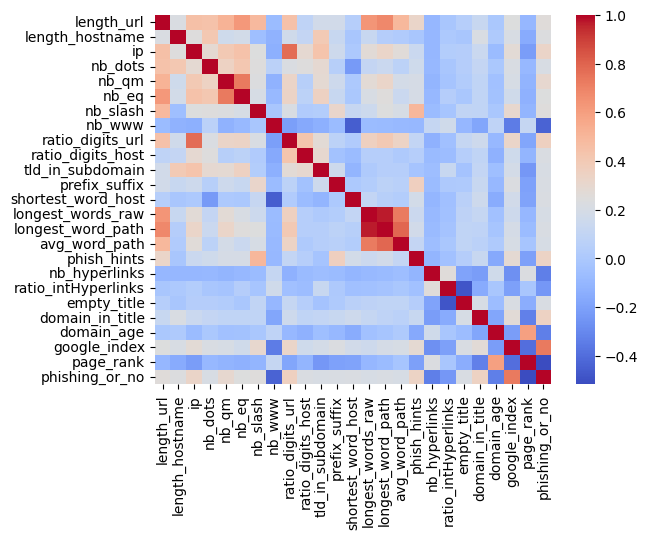

<Figure size 640x480 with 0 Axes>

In [7]:
# Plotting correlation heatmap

sns.heatmap(corr_matrix, cmap="coolwarm", fmt=".2f")
plt.figure()
plt.show()

In [8]:
# Dropping multicollinear features

df.drop('longest_word_path', axis=1, inplace=True)

In [9]:
# Splitting the dataset (70% train, 30% test)

X = df.drop('phishing_or_no', axis=1)
y = df['phishing_or_no']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [10]:
# Training, testing, and evaluating a Logistic Regression model

model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')
print('\nConfusion Matrix:')
print(conf_matrix)

Accuracy: 0.93
Precision: 0.93
Recall: 0.92
F1 Score: 0.93

Confusion Matrix:
[[1576  109]
 [ 130 1562]]


In [11]:
# Training, testing, and evaluating a Random Forest model

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')
print('\nConfusion Matrix:')
print(conf_matrix)

Accuracy: 0.96
Precision: 0.96
Recall: 0.97
F1 Score: 0.96

Confusion Matrix:
[[1622   63]
 [  56 1636]]


In [12]:
# Training, testing, and evaluating a Support Vector Machines (SVM) model

model = SVC(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')
print('\nConfusion Matrix:')
print(conf_matrix)

Accuracy: 0.94
Precision: 0.94
Recall: 0.93
F1 Score: 0.94

Confusion Matrix:
[[1589   96]
 [ 121 1571]]
